In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [4]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [6]:
X_train = X[:40]
X_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56], dtype=int32)>

In [17]:
y_train = y[:40]
y_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66], dtype=int32)>

In [19]:
X_test = X[40:]
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [13]:
y_test = y[40:]
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [15]:
X_train.shape, X_test.shape

(TensorShape([40]), TensorShape([40]))

In [14]:
y_train.shape, y_test.shape

(TensorShape([10]), TensorShape([10]))

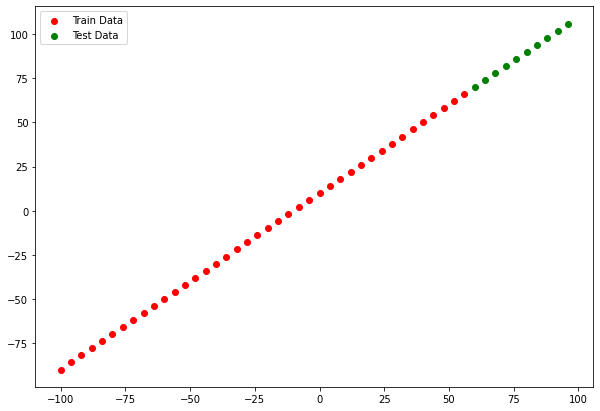

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='r', label='Train Data')
plt.scatter(X_test, y_test, c='g', label='Test Data')
plt.legend()

In [27]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(4, input_shape=[1])
])

model.compile(

  loss=tf.keras.losses.mae,
  optimizer= tf.keras.optimizers.SGD(),
  metrics=['mae']
)


In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(tf.expand_dims(X_train, axis=1),y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 7.4494 - mae: 7.4494
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2391 - mae: 9.2391
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 9.6116 - mae: 9.6116
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.7602 - mae: 8.7602
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 9.7251 - mae: 9.7251
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 8.9002 - mae: 8.9002
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.0002 - mae: 8.0002
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 8.1138 - mae: 8.1138
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.0986 - mae: 19.0986
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 9.3698 - mae: 9.3698
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 7.54

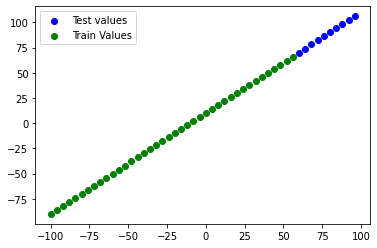

In [30]:
plt.scatter(X_test,y_test, c='b',label='Test values')
plt.scatter(X_train, y_train, c='g', label='Train Values')
plt.legend()
plt.show()